# Домашняя работа №2 
## Кузьмиченко Полина Б06-901

## задача 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import scipy 
from scipy.integrate import solve_ivp

## Задача 1. Линейные задачи. Устойчивость методов.

Решить численно задачу о колебаниях в системе, где и возвращающая сила, и коэффициент вязкого трения убывают со временем (уравнение Эйлера):

$$ x" +\frac{100x}{t^2}=0$$

Где t=[1,101], x(1)=1, x'(1)=1

## A
Найдем точное решение системы.
Будем искать точное решение в виде  x=t^a  , где a, вообще говоря, комплексное.


$$ x(t) = \frac{\sqrt{t} \sin(\frac{1}{2} \sqrt{399} \ln(t))}{\sqrt{399}} + \sqrt{t} \cos(\frac{1}{2}\sqrt{399} \ln(t))$$

Приведем исходное уравнение к системе:
$$x'=y$$
$$y'=\frac{-100x}{t^2}$$

In [2]:
#Система ДУ
def f(t, x, y):
    return y
def g(t, x, y):
    return -100*x/t**2

#Начальные условия
t0 = 1
x0 = 1
y0 = 1

h = 0.1

T1 = 1
T2 = 10
T3 = 100
T4 = 1000

#Точное решение
def true_x(i):
    d = []
    for t in i:
        d.append((t**(1/2)*m.sin(m.sqrt(399)/2*m.log(t))/m.sqrt(399) + t**(1/2)*m.cos(m.sqrt(399)/2*m.log(t))))
    return d

## Б
Используя численные методы Эйлера (явный, неявный, с центральной точкой),
методы Дормана-Принса и трапеций, получить численные решения с шагом 0,1 для
Т = 1,10,100,1000. Объяснить полученные результаты. Уменьшить $\tau$ вдвое. Объяснить
полученные результаты.


## Метод Эйлера явный

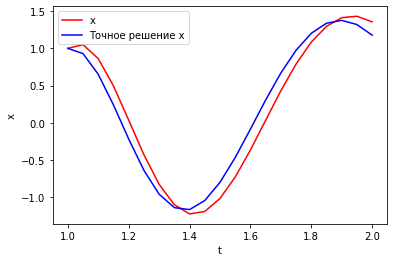

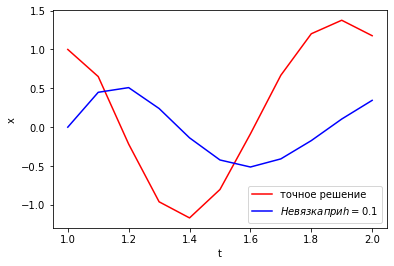

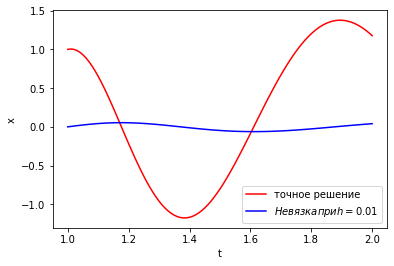

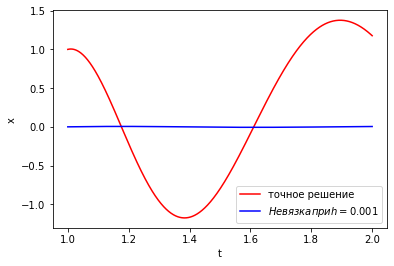

In [29]:
def Euler(f,g,v0,w0,h,T):
    v=[v0]
    w=[w0]
    for i in range(1, int(T/h)+1):
        v.append(v[-1]+h*f(1+(i)*h,v[-1],w[-1] ))
        w.append(w[-1]+h*g(1+(i)*h,v[-1],w[-1]))
    return v

 
T_e = 1
h = 0.05

x= Euler(f, g, x0, y0, h, T_e)
t = np.linspace(1, 1+T_e, int(T_e/h)+1) 
plt.xlabel('t')
plt.ylabel('x')
plt.plot(t, x, "red", label="x")
plt.plot(t, true_x(t), "blue", label="Точное решение x")
plt.legend()
plt.show()

for h in [0.1 , 0.01 , 0.001 ]:
    x= Euler(f, g, x0, y0, h, T_e)
    t = np.linspace(1, 1+T_e, int(T_e/h)+1) 
    plt.xlabel('t')
    plt.ylabel('x')
    plt.plot(t, true_x(t), "red", label="точное решение")
    true = true_x(t)
    x_m=[]
    for i in range(len(t)):
        x_m.append(x[i] - true[i])
    plt.plot(t , x_m, "blue", label=r'$Невязка при h = {}$'.format(h))
    plt.legend()
    plt.show()

## Метод Эйлера неявный

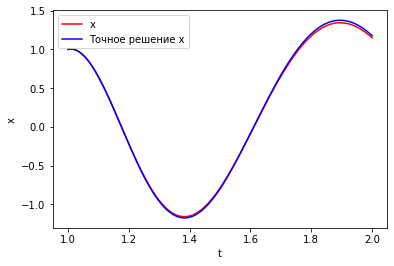

In [4]:
def implicit_Euler(h, T, x0, y0):
    N = int(T/h)
    v=[x0]
    w=[y0]
    t = np.linspace(1, 1+T,N+1)
    for i in range(1, N+1):
        w.append((w[i-1] -100*h*v[i-1]/t[i]**2)/(1+ 100*h**2/t[i]**2))
        v.append(v[i-1] + h*w[i])
    return v  


T_ie = 1
h = 0.001 # при других h плохо работает
t = np.linspace(1, 1+T_ie, int(T_ie/h)+1) 

x= implicit_Euler(h, T_ie, x0, y0)
t = np.linspace(1, 1+T_ie, int(T_ie/h)+1) 
plt.xlabel('t')
plt.ylabel('x')
plt.plot(t, x, "red", label="x")
plt.plot(t, true_x(t), "blue", label="Точное решение x")
plt.legend()
plt.show()

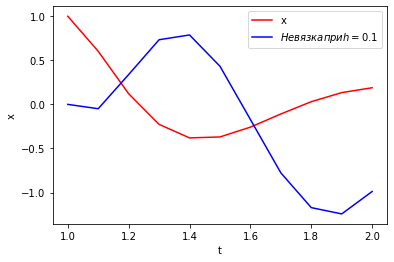

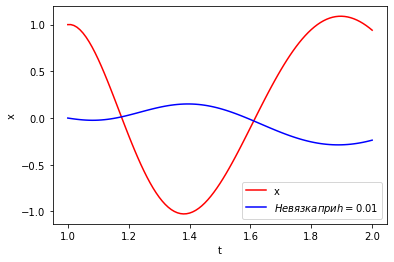

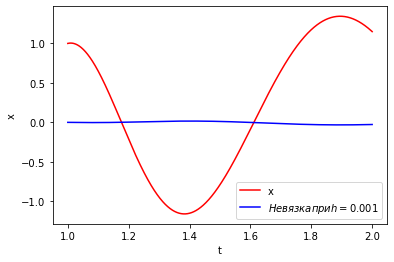

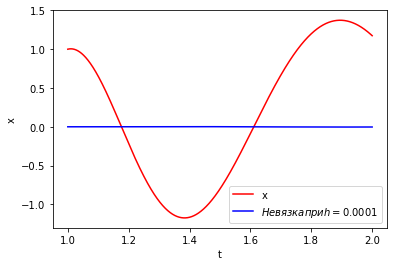

In [25]:

T_ie = 1

for h in [0.1 , 0.01 , 0.001 , 0.0001]:
    t = np.linspace(1, 1+T_ie, int(T_ie/h)+1) 
    x= implicit_Euler(h, T_ie, x0, y0)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.plot(t, x, "red", label="x")
    true = true_x(t)
    x_m=[]
    for i in range(len(t)):
        x_m.append(x[i] - true[i])
    plt.plot(t , x_m, "blue", label=r'$Невязка при h = {}$'.format(h))
    plt.legend()
    plt.show()

## Метод Эйлера с центральной точкой

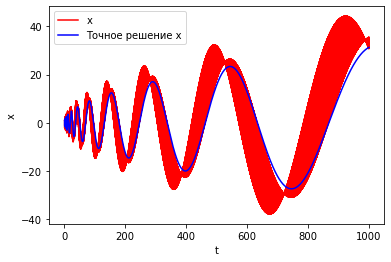

In [15]:
def Euler_center(h, T, x0, y0):
    N = int(T/h)
    v=[x0]
    w=[y0]
    t = np.linspace(1, 1+T,N+1)
    #в начале используем метод трапеций на первой итерации
    w.append((w[0] + h/2*g(t[0], v[0], w[0])+h/2*(-100/t[1]*(v[0]+h/2*w[0])))/(1+100*h/(2*t[1])))
    v.append(v[0] + h/2*(w[0] + w[1]))
    for i in range(2, N+1):
        v.append(v[i-2] + 2*h*f(t[i-1], v[i-1], w[-1]))
        w.append(w[i-2] + 2*h*g(t[i-1], v[i-1], w[-1]))
    return v

T_ec = 1000
h = 0.1
t = np.linspace(1, 1+T_ec, int(T_ec/h)+1) 

x= Euler_center(h,T_ec, x0, y0)
t = np.linspace(1, 1+T_ec, int(T_ec/h)+1) 
plt.xlabel('t')
plt.ylabel('x')
plt.plot(t, x, "red", label="x")
plt.plot(t, true_x(t), "blue", label="Точное решение x")
plt.legend()
plt.show()

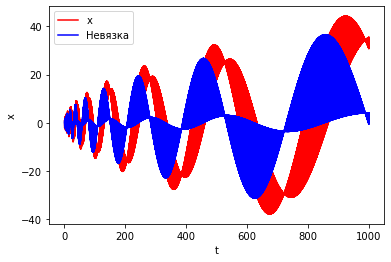

In [13]:
T_ec = 1000
h = 0.1
t = np.linspace(1, 1+T_ec, int(T_ec/h)+1) 

x= Euler_center(h,T_ec, x0, y0)
t = np.linspace(1, 1+T_ec, int(T_ec/h)+1) 
plt.xlabel('t')
plt.ylabel('x')
plt.plot(t, x, "red", label="x")
true = true_x(t)
x_m=[]
for i in range(len(t)):
    
    x_m.append(x[i] - true[i])
    
plt.plot(t , x_m, "blue", label="Невязка")
plt.legend()
plt.show()

Сравнение методов на отрезках [1, T + 1], где T = 1, 10, 100, 1000

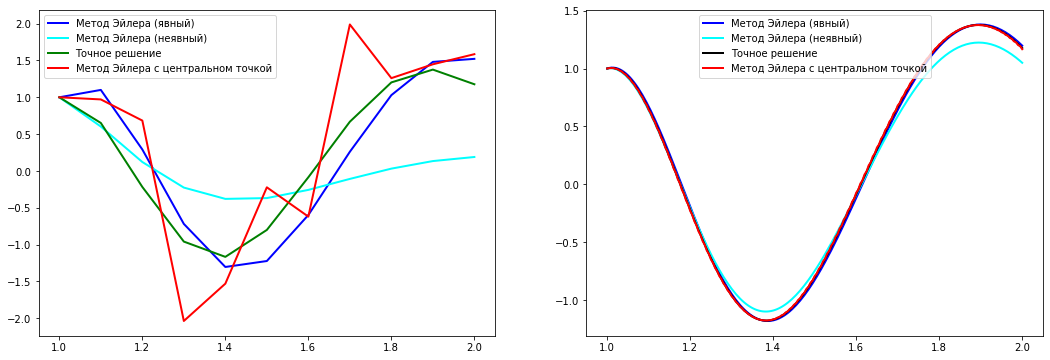

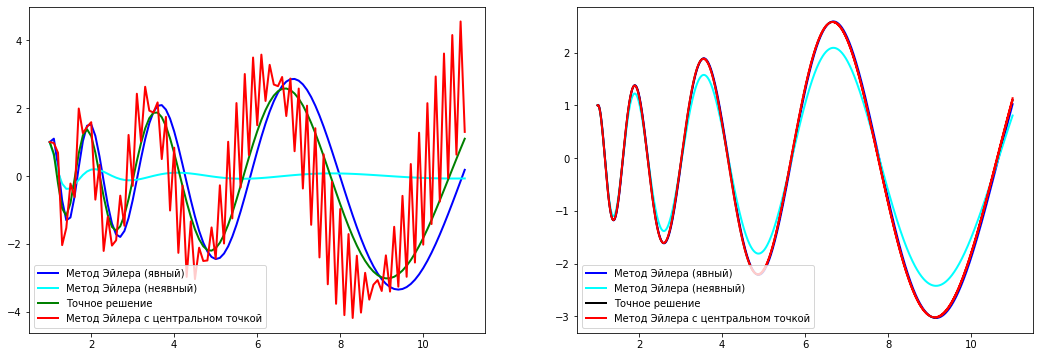

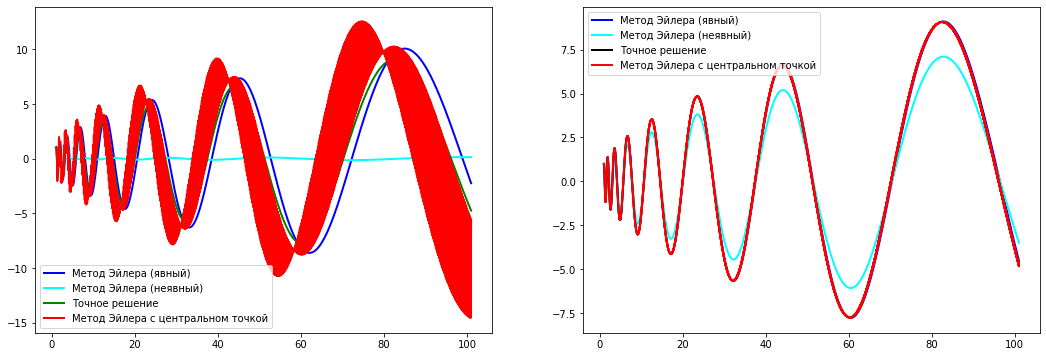

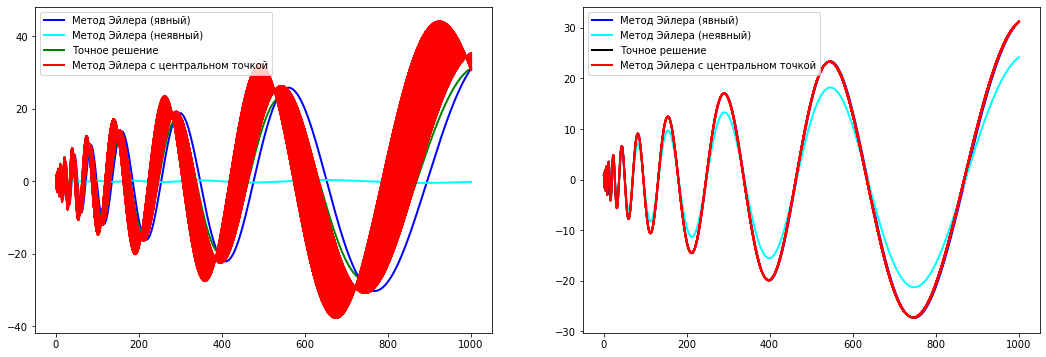

In [42]:
h1 = 0.1
h2 = 0.005
t0 = 1
x0 = 1
y0 = 1
for T in [1,10,100,1000]:
    
    t = np.linspace(1, 1+T,int(T/h1)+1)
    xc = true_x(t)
    xe = Euler(f, g, x0, y0, h1, T)
    xie = implicit_Euler(h1, T, x0, y0)
    xce = Euler_center(h1, T, x0, y0)
    plt.figure(figsize=(18, 6))
    plt.subplot(1,2,1)
    plt.plot(t, xe, 'blue', linewidth=2.0)
    plt.plot(t, xie, 'aqua', linewidth=2.0)
    plt.plot(t, xc, 'green', linewidth=2.0)
    plt.plot(t, xce, 'red', linewidth=2.0)
    plt.legend(('Метод Эйлера (явный)',
    'Метод Эйлера (неявный)',
    'Точное решение','Метод Эйлера с центральном точкой'), loc = 'best')
    #уменьшим ход 
    t = np.linspace(1, 1+T,int(T/h2)+1)
    xc = true_x(t)
    xe = Euler(f, g, x0, y0, h2, T)
    xie = implicit_Euler(h2, T, x0, y0)
    xce = Euler_center(h2, T, x0, y0)

    #plt.figure(figsize=(18, 6))
    
    plt.subplot(1,2,2)
    plt.plot(t, xe, 'blue', linewidth=2.0)
    plt.plot(t, xie, 'aqua', linewidth=2.0)
    plt.plot(t, xc, 'black', linewidth=2.0)
    plt.plot(t, xce, 'red', linewidth=2.0)
    plt.legend(('Метод Эйлера (явный)',
    'Метод Эйлера (неявный)',
    'Точное решение','Метод Эйлера с центральном точкой'
     ), loc = 'best')
    plt.show()



Из  "Введение в численные методы решения дифференциальных уравнений", Ортега Дж., Пул У.(стр. 62) по теореме метод называется устойчивым , если $y^{n+1}$ равен комбинации $y^{n+1-i}$ 1 <= i <= m с коэффицентами $\alpha_i$ , плюс функция $\phi$ от $x^k$ и  $y^{n+1-i}$ и если все нули полинома $\rho(\lambda) = \lambda^m - \alpha_1 \lambda^{m-1} ... - \alpha_m$ по модулю меньше либо равны 1 (строгая устойчивость при модуле строго меньше 1).Метод Эйлера с центральной точкой имеет полином вида  $ρ(\lambda)=\lambda^2−1 $  имеет 2 корня по модулю равных 1, но не является строго устойчивым.

Как видно, метод Эйлера с центральной точкой хорошо приближает точное решение на отрезке [1;2] и при маленьком шаге 
при уменьшенном шаге, но затем перестает сходиться к точному решению.

Разностное уравнение этого метода имеет 2 фундаметнальных решения, одно из которых аппроксимирует точное решение дифференциальной задачи, а другое "паразитное", при стремлении t к бесконечности это решение также стремится к бесконечности, что и видно на графиках.

## метод трапеций

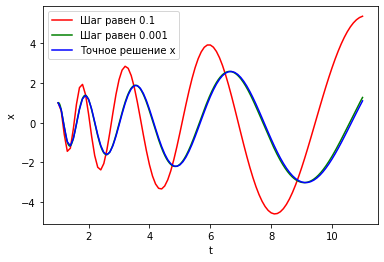

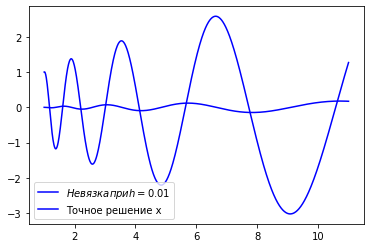

In [38]:
def tr(f, g, x0, y0, h, T):
    N = int(T/h)
    t = np.linspace(1, 1+T, int(T/h) +1)
    v = [x0]
    w = [y0]
    for i in range(1,N+1):
        k1 = v[i-1] + h * f(t[i-1], v[i-1], w[i-1])
        q1 =w[i-1] + h * g(t[i-1], v[i-1], w[i-1])
        v.append(v[i-1] +h/2 * (f(t[i-1], v[i-1], w[i-1]) + f(t[i-1], k1, q1)))
        w.append(w[i-1] + h/2 * (g(t[i-1], v[i-1], w[i-1]) + g(t[i-1], k1, q1)))
    return v
                                                                                          
T_6 = 10
h_0 = 0.1
h6 = 0.01
x= tr(f, g, x0, y0, h_0, T_6)
t = np.linspace(1, 1+T_6, int(T_6/h_0) +1)
t6 = np.linspace(1, 1+T_6, int(T_6/h6) +1)
x1= tr(f, g, x0, y0, h6, T_6)
plt.xlabel('t')
plt.ylabel('x')
plt.plot(t, x, "red", label="Шаг равен 0.1")
plt.plot(t6, x1, "green", label="Шаг равен 0.001")
plt.plot(t, true_x(t), "blue", label="Точное решение x")
plt.legend()
plt.show()
true = true_x(t6)
x_m=[]
for i in range(len(t6)):
    x_m.append(x1[i] - true[i])   
plt.plot(t6 , x_m, "blue", label = r'$Невязка при h = {}$'.format(h6) )
plt.plot(t6, x1, "blue", label="Точное решение x")
plt.legend()
plt.show()

При выборе шага меньше разность решений возрастает

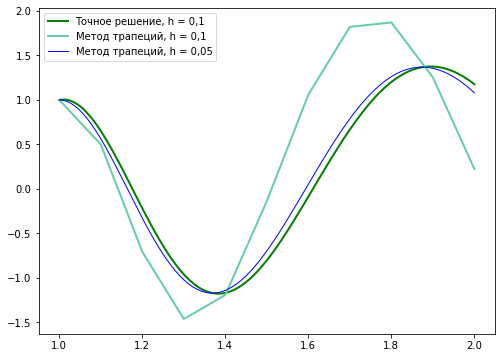

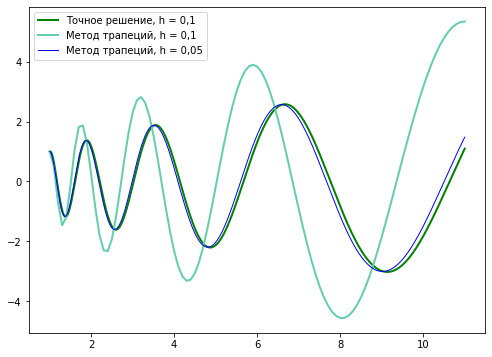

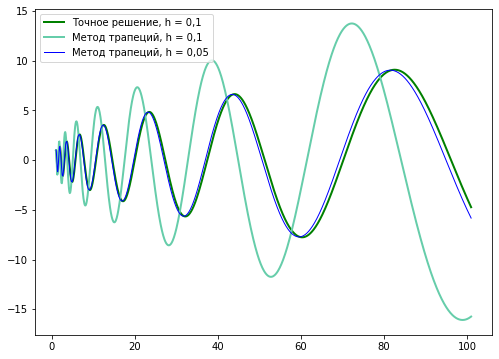

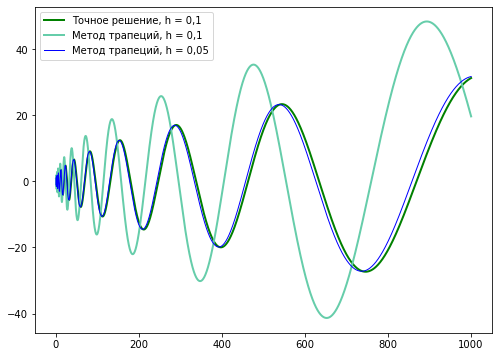

In [94]:
h1 = 0.1
h2 = 0.005 #точность возрастает с уменьшением шага
t0 = 1
x0 = 1
y0 = 0

for T in [1,10,100,1000]:
    t1 = np.linspace(1, 1+T,int(T/h1)+1)
    t2 = np.linspace(1, 1+T,int(T/h2)+1)
    xc = true_x(t2)
    xtr1 = tr(f, g, x0, y0, h1, T)
    xtr2 = tr(f, g, x0, y0, h2, T)
    plt.figure(figsize=(18, 6))
    plt.subplot(1,2,1)
    plt.plot(t2, xc, 'green', linewidth=2.0)
    plt.plot(t1, xtr1, 'mediumaquamarine', linewidth=2.0)
    # уменьшим шаг вдвое
    plt.plot(t2, xtr2, 'blue', linewidth=1.0)
    plt.legend(('Точное решение, h = 0,1',
      'Метод трапеций, h = 0,1','Метод трапеций, h = 0,05'), loc = 'upper left')

    plt.show()

При уменьшении шага метод трапеций достаточно хорошо приближает точное решение

Метод трапеций представляет следующую разностную схему:
$$
u_{n + 1} = u_n + \frac{\tau}{2} \cdot (f(t_n,u_n) + f(t_{n + 1}, u_{n + 1})).
$$
$$
y_{n+1} = \frac{y_n*((t+\tau)^2 - 25\tau) - 50*x_n*\frac{\tau}{t^2}((t+\tau)^2 + t^2)}{(t+\tau)^2+25\tau^2},
$$

$$
x_{n+1} = x_{n} + \frac{\tau}{2}(y_{n+1} + y_n)
$$

## Метод Дормана-Принса

In [50]:
def runge_kutta(s, c, b, a,T,h):
    v = [x0]
    w = [y0]

    t = np.linspace(1, T, h+1)

    N = T/h

    for x in t[:-1]:
        k_v = []
        k_w = []
        
        for step in range(s):
            x_cur = x + c[step] * N
            w_cur = w[-1] + sum([a[step][i] * k_w[i] for i in range(step)])
            v_cur = v[-1] + sum([a[step][i] * k_v[i] for i in range(step)])
            
            k_v.append(N*f(x_cur,v_cur,w_cur))
            k_w.append(N*g(x_cur,v_cur,w_cur))

        v.append(v[-1] + sum([b[i] * k_v[i] for i in range(s)]))
        w.append(w[-1] + sum([b[i] * k_w[i] for i in range(s)]))

    return v

In [51]:
s = 7
c = [0, 1/5, 3/10, 4/5, 8/9, 1, 1]
b = [35/384, 0, 500/1113, 125/192, -2187/6789, 11/84, 0]
a = [[0,          0,             0,          0,          0,           0,     0],
     [1/5,        0,             0,          0,          0,           0,     0],
     [3/40,       9/40,          0,          0,          0,           0,     0], 
     [44/45,      (- 56/15),      32/9,       0,          0,           0,     0], 
     [19372/6561, (- 25360/2187), 64448/6561, (- 212/729), 0,           0,     0], 
     [9017/3168,  (- 355/33),     46732/5247, 49/176,     (- 5103/18656), 0,     0], 
     [35/384,     0,             500/1113,   125/192,    (- 2187/6784),  11/84, 0]]



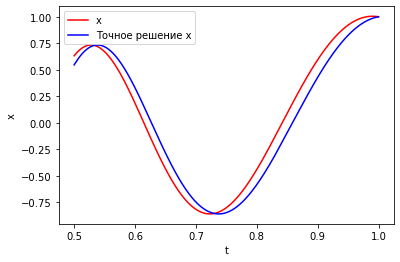

In [52]:
T = 0.5
h = 1000
t = np.linspace(1, T, h+1)
dormand_prince = runge_kutta(s, c, b, a,T,h)
x_dp = dormand_prince
plt.xlabel('t')
plt.ylabel('x')

plt.plot(t, x_dp, "red", label="x")
plt.plot(t, true_x(t), "blue", label="Точное решение x")
plt.legend()
plt.show()